In [2]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('drive/My Drive/Konspektid Magister/Semester 2./Ärianalüütika/BDA Project/sentimentdataset.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [31]:
# Strip all strings in object-type columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str).str.strip()

In [32]:
sentiments = data['Sentiment'].unique()
sentiments

array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [34]:
positive = {
    'Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration',
    'Affection', 'Awe', 'Surprise', 'Acceptance', 'Adoration', 'Anticipation',
    'Calmness', 'Excitement', 'Kind', 'Pride', 'Elation', 'Euphoria', 'Contentment',
    'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness',
    'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Curiosity', 'Determination',
    'Zest', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful',
    'Free-spirited', 'Inspired', 'Confident', 'Overjoyed', 'Inspiration', 'Motivation',
    'Contemplation', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Reflection',
    'Appreciation', 'Accomplishment', 'Wonderment', 'Optimism', 'Enchantment',
    'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 'Whimsy',
    'Pensive', 'Harmony', 'Creativity', 'Radiance', 'Wonder', 'Rejuvenation',
    'Coziness', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom',
    'Dazzle', 'ArtisticBurst', 'CulinaryOdyssey', 'Spark', 'Marvel', 'Positivity',
    'Kindness', 'Friendship', 'Success', 'Exploration', 'Amazement', 'Romance',
    'Captivation', 'Tranquility', 'Grandeur', 'Emotion', 'Energy', 'Celebration',
    'Charm', 'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey',
    'Engagement', 'Touched', 'Triumph', 'Heartwarming', 'Solace', 'Breakthrough',
    'Joy in Baking', 'Envisioning History', 'Imagination', 'Vibrancy', 'Mesmerizing',
    'Culinary Adventure', 'Winter Magic', 'Thrilling Journey', "Nature's Beauty",
    'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom",
    'Whispers of the Past', 'Relief', 'Happy'
}

neutral = {
    'Neutral', 'Numbness', 'Ambivalence', 'Indifference', 'Confusion',
    'Contemplation', 'Calmness', 'Serenity', 'Observation', 'Reflection'
}

negative = {
    'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter',
    'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment',
    'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy',
    'Regret', 'Heartbreak', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Isolation',
    'Disappointment', 'LostLove', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation',
    'Ruins', 'Desolation', 'Hate', 'Bad', 'Embarrassed', 'Mischievous', 'Obstacle',
    'Sympathy', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge',
    'Overwhelmed', 'Dismissive', 'Fearful', 'Apprehensive', 'Devastated', 'Frustrated',
    'Envious', 'Shame'
}

def map_sentiment(sent):
    if sent in positive:
        return 'Positive'
    elif sent in negative:
        return 'Negative'
    elif sent in neutral:
        return 'Neutral'
    else:
        return 'Neutral'

data['Sentiment_clean'] = data['Sentiment'].apply(map_sentiment)
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_clean
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral


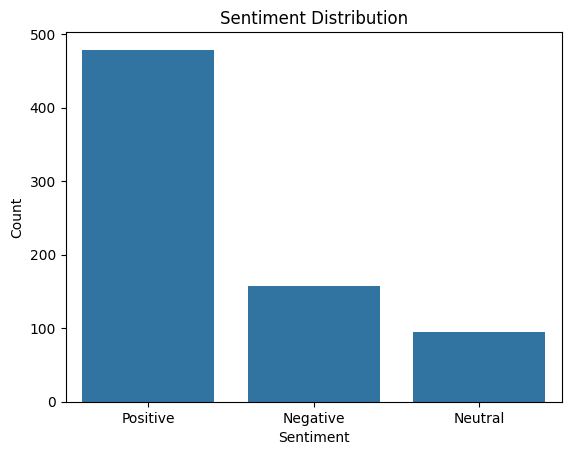

In [35]:
# Sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Sentiment_clean', order=data['Sentiment_clean'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

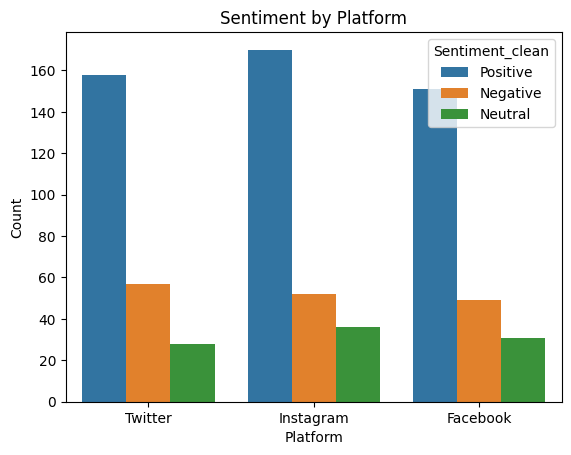

In [36]:
# Sentiment by Platform

sns.countplot(data=data, x='Platform', hue='Sentiment_clean')
plt.title('Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

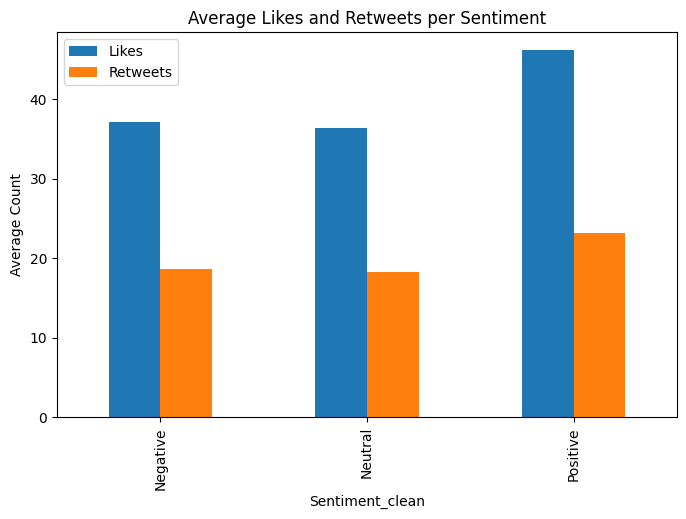

In [37]:
# Average Likes and Retweets per Sentiment

avg_engagement = data.groupby('Sentiment_clean')[['Likes', 'Retweets']].mean().reset_index()
avg_engagement.plot(x='Sentiment_clean', kind='bar', figsize=(8,5))
plt.title('Average Likes and Retweets per Sentiment')
plt.ylabel('Average Count')
plt.show()

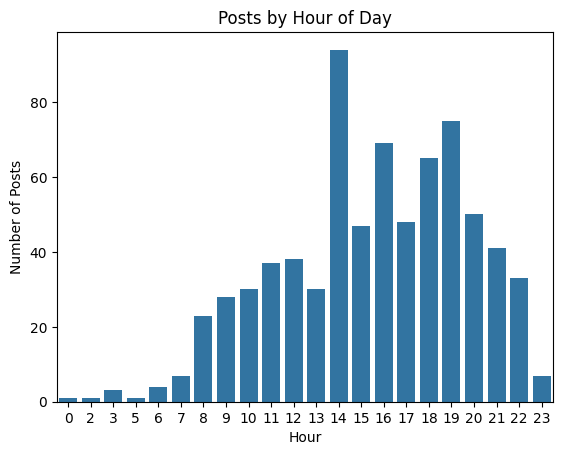

In [38]:
# Posts Over Time (Hourly Activity)

sns.countplot(data=data, x='Hour')
plt.title('Posts by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Posts')
plt.show()

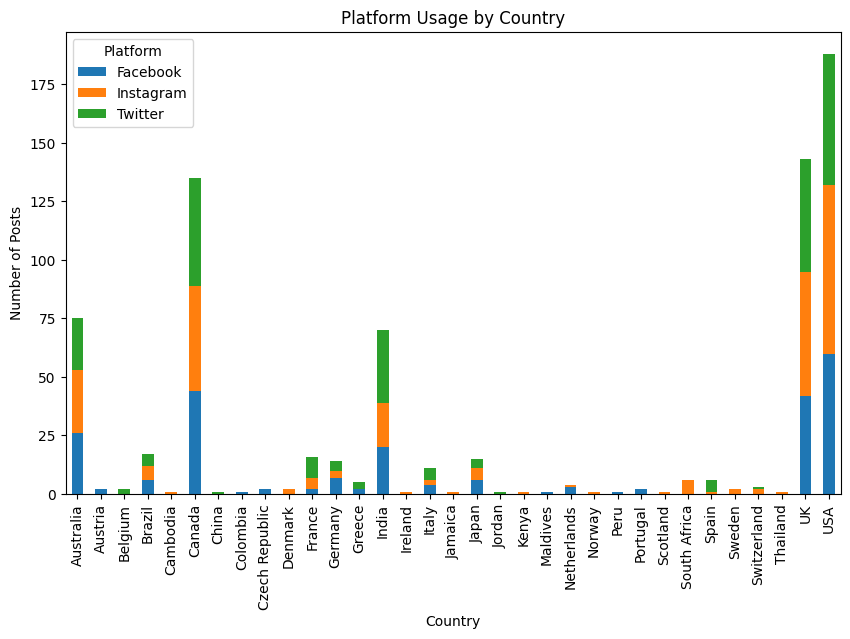

In [39]:
# Platform Usage by Country

platform_country = data.groupby(['Country', 'Platform']).size().unstack().fillna(0)
platform_country.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Platform Usage by Country')
plt.ylabel('Number of Posts')
plt.show()

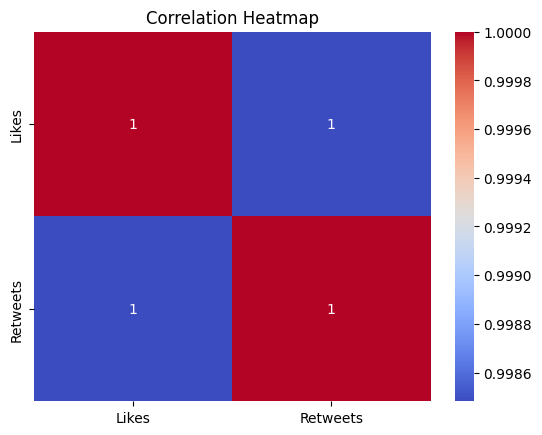

In [40]:
# Correlation Heatmap (Likes & Retweets)

sns.heatmap(data[['Likes', 'Retweets']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

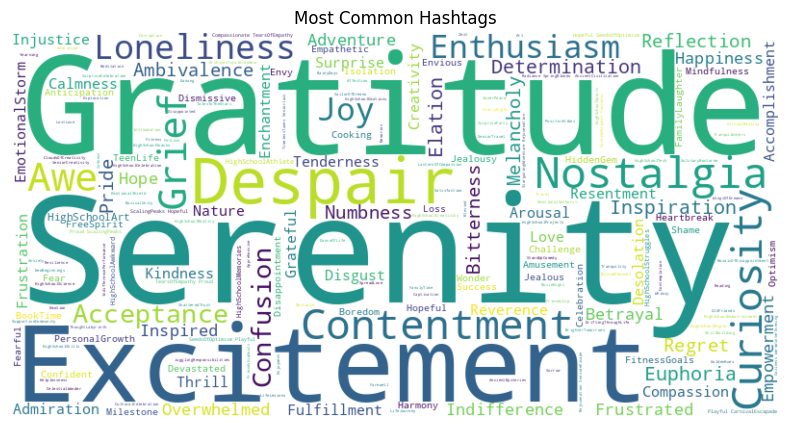

In [41]:
# Top Hashtags Word Cloud (Optional)

from wordcloud import WordCloud

all_hashtags = ' '.join(data['Hashtags'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Hashtags')
plt.show()